In [28]:
import python_src.thingspeak as thingspeak
import json

import pandas as pd


In [29]:
sbell = thingspeak.TSAccount('https://api.thingspeak.com/','869L0PHK8GKAIIYQ')

In [30]:
sbell.list_my_channels()

[{'id': 843357,
  'name': 'ShopEnv',
  'description': 'Testing out a temperature sensor\r\nBMP (Press and Temp) sensor in shop... has been moved and played with.  Stationary since ?',
  'latitude': '0.0',
  'longitude': '0.0',
  'created_at': '2019-08-08T21:45:02Z',
  'elevation': '',
  'last_entry_id': 122351,
  'public_flag': True,
  'url': '',
  'ranking': 50,
  'metadata': '',
  'license_id': 0,
  'github_url': 'NaN',
  'tags': [],
  'api_keys': [{'api_key': 'CZY04CZ4QODM0WEJ', 'write_flag': True},
   {'api_key': 'A71HJNG9AHAN0AMI', 'write_flag': False}]},
 {'id': 1027974,
  'name': 'Troom',
  'description': 'Temperature using TMP36 (transitor)',
  'latitude': '0.0',
  'longitude': '0.0',
  'created_at': '2020-03-29T17:41:23Z',
  'elevation': '',
  'last_entry_id': 26527,
  'public_flag': True,
  'url': '',
  'ranking': 50,
  'metadata': '',
  'license_id': 0,
  'github_url': 'NaN',
  'tags': [],
  'api_keys': [{'api_key': 'L459K7EKJPLJGFRT', 'write_flag': True},
   {'api_key': 'WL

In [31]:
sbellc = thingspeak.TSChannel(acc_host_addr='https://api.thingspeak.com/',api_key='QS3DYISJPLE5EQCW'
,ch_id=1037066)

dt11 = sbellc.get_a_channel_field_feed(['field1','field2'],parameters={'days':10})
#tmp102 = sbellc.get_a_channel_field_feed('field3',parameters={'days':10})

dt11_df = pd.DataFrame(dt11['feeds'])
dt11_df = dt11_df.set_index(pd.DatetimeIndex(dt11_df['created_at']))
dt11_df['field1'] = dt11_df['field1'].astype('float64')
dt11_df['field2'] = dt11_df['field2'].astype('float64')



In [32]:
sbellc = thingspeak.TSChannel(acc_host_addr='https://api.thingspeak.com/',api_key='QS3DYISJPLE5EQCW'
,ch_id=1027974)

tmp36 = sbellc.get_a_channel_field_feed('field1',parameters={'days':10})

tmp36_df = pd.DataFrame(tmp36['feeds'])
tmp36_df = tmp36_df.set_index(pd.DatetimeIndex(tmp36_df['created_at']))
tmp36_df['field1'] = tmp36_df['field1'].astype('float64')



In [33]:
sbellc = thingspeak.TSChannel(acc_host_addr='https://api.thingspeak.com/',api_key='QS3DYISJPLE5EQCW'
,ch_id=843357)

bmp = sbellc.get_a_channel_field_feed('field3',parameters={'days':10})

bmp_df = pd.DataFrame(bmp['feeds'])
bmp_df = bmp_df.set_index(pd.DatetimeIndex(bmp_df['created_at']))
bmp_df['field3'] = bmp_df['field3'].astype('float64')



In [34]:
sbellc = thingspeak.TSChannel(acc_host_addr='https://api.thingspeak.com/',api_key='QS3DYISJPLE5EQCW'
,ch_id=1047747)

test = sbellc.get_a_channel_field_feed(['field1','field2','field3'],parameters={'days':10})
#tmp102 = sbellc.get_a_channel_field_feed('field3',parameters={'days':10})

test_df = pd.DataFrame(test['feeds'])
test_df = test_df.set_index(pd.DatetimeIndex(test_df['created_at']))
test_df['field1'] = test_df['field1'].astype('float64')
test_df['field2'] = test_df['field2'].astype('float64')
test_df['field3'] = test_df['field3'].astype('float64')



(737539.6306712963, 737545.7723611111)

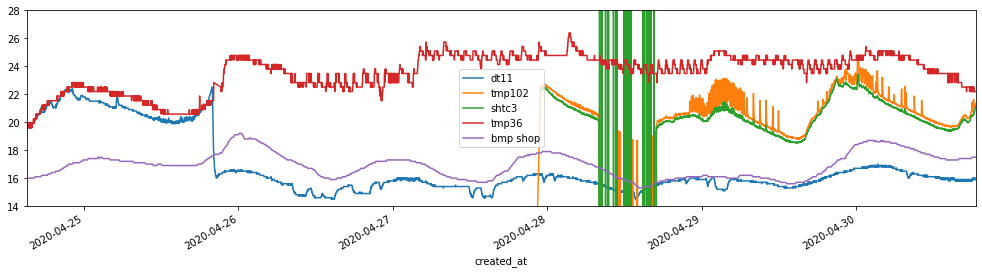

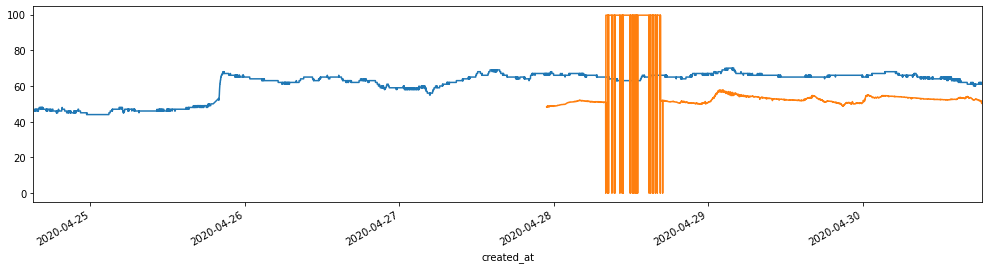

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import cmocean

fig, ax = plt.subplots(figsize=(17, 4))
dt11_df.field1.plot(ax=ax,label='dt11')
test_df.field1.plot(ax=ax,label='tmp102')
test_df.field2.plot(ax=ax,label='shtc3')
tmp36_df.field1.plot(ax=ax,label='tmp36')
bmp_df.field3.plot(ax=ax,label='bmp shop')

ax.set_xlim(tmp36_df.index.min(), bmp_df.index.max())
ax.set_ylim([14,28])

ax.legend()

fig, ax = plt.subplots(figsize=(17, 4))
dt11_df.field2.plot(ax=ax,label='dt11')
test_df.field3.plot(ax=ax,label='shtc3')
ax.set_xlim(tmp36_df.index.min(), bmp_df.index.max())
